## Linear Regression Implement

1. Business Problem Understanding

2. Data Ingestion/ Collecction -> SQL

3. Data Understanding -> Rows (Record) , Column(Feature)

4. Exploratory Data Analyies(EDA) -> statietics -> 80 % time taken,
  
 - Data Normalization, Standardization , Missing value, Visualization, Correlation, heatMap, feature Engineering, Feature Selection, Plots.

5. Data Split
  - Train set , Test set (80:20)

6. Model Training
    - which algoritham suits most according dataset (labels and unlabels)
    - Overfitting , underFitting

7. Model Testing
  - Model prediction y cap , y(actual value)

8. Model Evaluation
  - MSE, MAE, RMSE, R-squaare, Adjueted R square

  - Accuracy, Drecision, Recall, Classification taske , Confation matrix  

9. Model Deployment
  

Import all the required libraries

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Load the data

In [ ]:
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()

In [ ]:
type(housing)

sklearn.utils._bunch.Bunch

In [ ]:
housing

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [ ]:
print(housing.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census, using one row per ce

In [ ]:
print(housing.feature_names)

['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']


In [ ]:
print(housing.target)

[4.526 3.585 3.521 ... 0.923 0.847 0.894]


In [ ]:
print(housing.data)

[[   8.3252       41.            6.98412698 ...    2.55555556
    37.88       -122.23      ]
 [   8.3014       21.            6.23813708 ...    2.10984183
    37.86       -122.22      ]
 [   7.2574       52.            8.28813559 ...    2.80225989
    37.85       -122.24      ]
 ...
 [   1.7          17.            5.20554273 ...    2.3256351
    39.43       -121.22      ]
 [   1.8672       18.            5.32951289 ...    2.12320917
    39.43       -121.32      ]
 [   2.3886       16.            5.25471698 ...    2.61698113
    39.37       -121.24      ]]


Data Preparation

In [ ]:
dataset = pd.DataFrame(housing.data, columns=housing.feature_names)
dataset

MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0      8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1      8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2      7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3      5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4      3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   
...       ...       ...       ...        ...         ...       ...       ...   
20635  1.5603      25.0  5.045455   1.133333       845.0  2.560606     39.48   
20636  2.5568      18.0  6.114035   1.315789       356.0  3.122807     39.49   
20637  1.7000      17.0  5.205543   1.120092      1007.0  2.325635     39.43   
20638  1.8672      18.0  5.329513   1.171920       741.0  2.123209     39.43   
20639  2.3886      16.0  5.254717   1.162264      1387.0  2.616981     39.37   

       Longitude  
0        -122.23  
1        -122.22  
2        -122.24  
3        -122.25  
4        -122.25  
...          ...  
20635    -121.09  
20636    -121.21  
20637    -121.22  
20638    -121.32  
20639    -121.24  

[20640 rows x 8 columns]

In [ ]:
dataset.head()

MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  
0    -122.23  
1    -122.22  
2    -122.24  
3    -122.25  
4    -122.25

Task 1: Perform the EDA on the above dataset and provide the quality data by tomorrow.

In [ ]:
dataset['Price'] = housing.target
dataset.head()

MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  Price  
0    -122.23  4.526  
1    -122.22  3.585  
2    -122.24  3.521  
3    -122.25  3.413  
4    -122.25  3.422

Data Split

In [ ]:
X = dataset.iloc[:, :-1]
y = dataset.iloc[:, -1]

In [ ]:
X

MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0      8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1      8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2      7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3      5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4      3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   
...       ...       ...       ...        ...         ...       ...       ...   
20635  1.5603      25.0  5.045455   1.133333       845.0  2.560606     39.48   
20636  2.5568      18.0  6.114035   1.315789       356.0  3.122807     39.49   
20637  1.7000      17.0  5.205543   1.120092      1007.0  2.325635     39.43   
20638  1.8672      18.0  5.329513   1.171920       741.0  2.123209     39.43   
20639  2.3886      16.0  5.254717   1.162264      1387.0  2.616981     39.37   

       Longitude  
0        -122.23  
1        -122.22  
2        -122.24  
3        -122.25  
4        -122.25  
...          ...  
20635    -121.09  
20636    -121.21  
20637    -121.22  
20638    -121.32  
20639    -121.24  

[20640 rows x 8 columns]

In [ ]:
y

0        4.526
1        3.585
2        3.521
3        3.413
4        3.422
         ...  
20635    0.781
20636    0.771
20637    0.923
20638    0.847
20639    0.894
Name: Price, Length: 20640, dtype: float64

Train Test Split

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=44)

In [ ]:
X_train

MedInc  HouseAge   AveRooms  AveBedrms  Population  AveOccup  Latitude  \
5567   2.6618      19.0   4.666667   1.142132      2047.0  3.463621     33.88   
3116   3.9261      12.0   5.657303   1.044944      1027.0  2.884831     35.63   
4750   2.5320      39.0   3.734257   1.022670      2638.0  3.322418     34.04   
13963  3.9688      15.0  16.550562   3.078652       622.0  2.329588     34.24   
2262   1.9575      24.0   4.528424   1.058140      2098.0  2.710594     36.79   
...       ...       ...        ...        ...         ...       ...       ...   
18528  3.2437      44.0   4.996139   1.038610       645.0  2.490347     36.96   
20355  1.9811      16.0   6.104730   1.168919       587.0  1.983108     34.19   
16955  6.0000      40.0   5.990196   1.006536       751.0  2.454248     37.53   
3491   5.1408      33.0   5.359862   0.913495       881.0  3.048443     34.27   
14100  1.5517      31.0   3.110831   0.974811       816.0  2.055416     32.76   

       Longitude  
5567     -118.28  
3116     -117.76  
4750     -118.32  
13963    -116.87  
2262     -119.83  
...          ...  
18528    -122.04  
20355    -118.96  
16955    -122.30  
3491     -118.47  
14100    -117.09  

[16512 rows x 8 columns]

In [ ]:
y_train

5567     1.797
3116     1.013
4750     1.727
13963    1.828
2262     0.670
         ...  
18528    2.239
20355    1.625
16955    3.842
3491     2.229
14100    1.225
Name: Price, Length: 16512, dtype: float64

In [ ]:
X_test

MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
20127   4.4219      34.0  5.850220   1.074890       795.0  3.502203     34.40   
18256   6.1995      36.0  6.309756   1.014634      1055.0  2.573171     37.38   
10376  10.1531       2.0  9.906329   1.130380      2985.0  3.778481     33.64   
4109    6.5533      34.0  6.431154   1.086231      1572.0  2.186370     34.14   
8169    5.0447      36.0  5.953020   1.003356       784.0  2.630872     33.81   
...        ...       ...       ...        ...         ...       ...       ...   
2312    3.9032       3.0  5.863330   1.192913      4432.0  2.492688     36.85   
18574   2.5599      42.0  2.826446   0.966942      2312.0  4.776860     36.91   
14552   6.4696      10.0  7.217391   0.971014      1700.0  3.519669     32.97   
1430    4.6375      28.0  6.281780   1.129237      1591.0  3.370763     38.00   
4977    2.1354      44.0  4.613158   1.018421      1165.0  3.065789     34.00   

       Longitude  
20127    -118.98  
18256    -122.09  
10376    -117.62  
4109     -118.39  
8169     -118.12  
...          ...  
2312     -119.74  
18574    -121.75  
14552    -117.13  
1430     -122.02  
4977     -118.29  

[4128 rows x 8 columns]

In [ ]:
y_test

20127    3.38100
18256    4.07200
10376    4.84100
4109     5.00001
8169     2.49200
          ...   
2312     1.40800
18574    1.51400
14552    2.49500
1430     1.78200
4977     1.05800
Name: Price, Length: 4128, dtype: float64

Data Standardization

Task 2: Why we are not doing fit_transform in the test set and let's say if we do fit_transform in the test set what will be the impact on the model's result?

**Data Leakage (major problem in the industry work)**

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
X_train

array([[-6.39313890e-01, -7.70123468e-01, -3.18448077e-01, ...,
         3.12799921e-02, -8.18307745e-01,  6.42275354e-01],
       [ 2.55369484e-02, -1.32842869e+00,  9.00311043e-02, ...,
        -1.86339026e-02,  2.97361003e-05,  9.01327246e-01],
       [-7.07571138e-01,  8.25034301e-01, -7.02917949e-01, ...,
         1.91028816e-02, -7.43488318e-01,  6.22348286e-01],
       ...,
       [ 1.11612791e+00,  9.04792190e-01,  2.27296098e-01, ...,
        -5.57667090e-02,  8.88510430e-01, -1.36039504e+00],
       [ 6.64304894e-01,  3.46486970e-01, -3.26160516e-02, ...,
        -4.52430976e-03, -6.35935392e-01,  5.47621779e-01],
       [-1.22307638e+00,  1.86971194e-01, -9.59981326e-01, ...,
        -9.01614158e-02, -1.34204373e+00,  1.23510564e+00]])

In [ ]:
X_test

array([[ 2.86260705e-01,  4.26244859e-01,  1.69578464e-01, ...,
         3.46072137e-02, -5.75144608e-01,  2.93551655e-01],
       [ 1.22103793e+00,  5.85760636e-01,  3.59063490e-01, ...,
        -4.55110319e-02,  8.18367217e-01, -1.25577793e+00],
       [ 3.30009692e+00, -2.12600757e+00,  1.84207456e+00, ...,
         5.84330242e-02, -9.30536885e-01,  9.71071986e-01],
       ...,
       [ 1.36307401e+00, -1.48794446e+00,  7.33317830e-01, ...,
         3.61134621e-02, -1.24384324e+00,  1.21517858e+00],
       [ 3.99637151e-01, -5.23024719e-02,  3.47527685e-01, ...,
         2.32720415e-02,  1.10829250e+00, -1.22090556e+00],
       [-9.16129109e-01,  1.22382374e+00, -3.40511886e-01, ...,
        -3.02836919e-03, -7.62193175e-01,  6.37293587e-01]])

Model Training

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
print(model.coef_)

[ 0.83215514  0.11519221 -0.2633912   0.31621969 -0.00115802 -0.03990048
 -0.90741623 -0.87609073]


In [ ]:
print(model.intercept_)

2.067763302446704


Model Prediction

In [ ]:
y_cap = model.predict(X_test)
print(y_cap)

[2.55823281 3.35684836 4.09751962 ... 2.80867915 2.38870762 1.61280809]


Model Evaluation

In [ ]:
residuals = y_test - y_cap
residuals

20127    0.822767
18256    0.715152
10376    0.743480
4109     1.707415
8169    -0.172330
           ...   
2312    -0.014145
18574   -0.691329
14552   -0.313679
1430    -0.606708
4977    -0.554808
Name: Price, Length: 4128, dtype: float64

/tmp/ipython-input-28-2593592280.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(residuals, kde=True)


<Axes: xlabel='Price', ylabel='Density'>

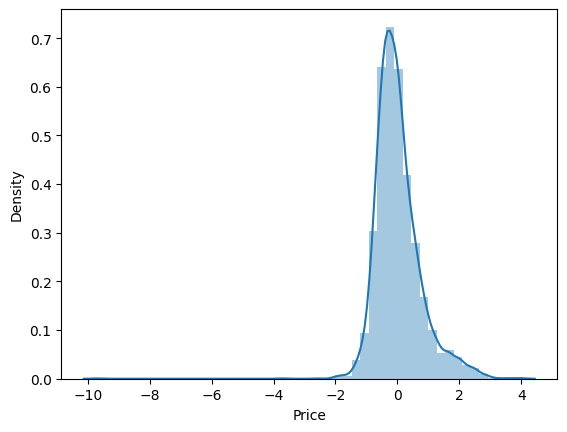

In [ ]:
# Normality -> Distribution plot of the above residuals == it should be normally distributed
sns.distplot(residuals, kde=True)

Model Evaluation

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
print(mean_squared_error(y_test, y_cap))
print(mean_absolute_error(y_test, y_cap))
print(np.sqrt(mean_squared_error(y_test, y_cap)))

0.5347838950335048
0.5278504031670417
0.7312892006815804


R-squared vs Adjusted R-squared

Save the model -> Pickle File

In [ ]:
import pickle
pickle.dump(model, open('linear_reg_model.pkl', 'wb'))

In [ ]:
model = pickle.load(open('linear_reg_model.pkl', 'rb'))

In [ ]:
model.predict(X_test)

array([2.55823281, 3.35684836, 4.09751962, ..., 2.80867915, 2.38870762,
       1.61280809])